## Step 1: Import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Step 2: Load Dataset

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Codveda Projects\Task 6 Clustering (Unsupervised Learning)\Data\Housing dataset.csv")

# Preview data
print(df.head())
print(df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Step 3: Preprocess the data

- Handle categorical variables (one-hot encoding).

- Standardize numerical features.

In [4]:
# Drop ID if present
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


### Step 4: Impute missing values with column mean

In [6]:
from sklearn.impute import SimpleImputer

# Impute missing values with column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_encoded)

# Then standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


## Step 4: Elbow method (to find optimal K)

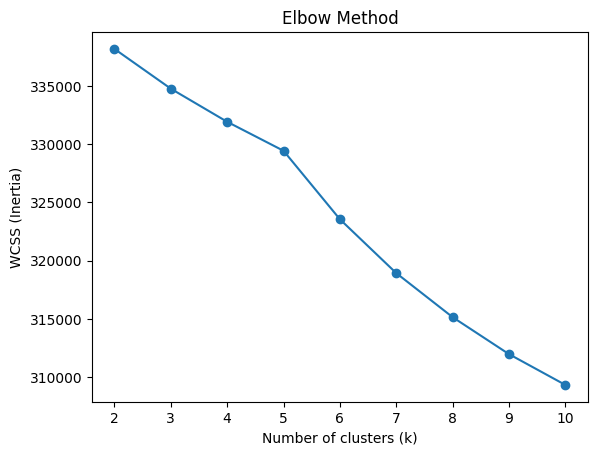

In [11]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 6 Clustering (Unsupervised Learning)\Visuals\Elbow Method.png", dpi=300, bbox_inches='tight')
plt.show()


### Step 6: Silhouette score (alternative metric)

In [8]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.057
k=3, Silhouette Score=0.057
k=4, Silhouette Score=0.057
k=5, Silhouette Score=0.058
k=6, Silhouette Score=0.050
k=7, Silhouette Score=0.001
k=8, Silhouette Score=-0.015
k=9, Silhouette Score=0.010
k=10, Silhouette Score=0.011


## Step 7: Apply KMeans with chosen k

- Suppose elbow/silhouette suggests k=3:

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df["Cluster"].value_counts())


Cluster
0    857
1    601
2      2
Name: count, dtype: int64


## Step 8: Visualize clusters in 2D (PCA)

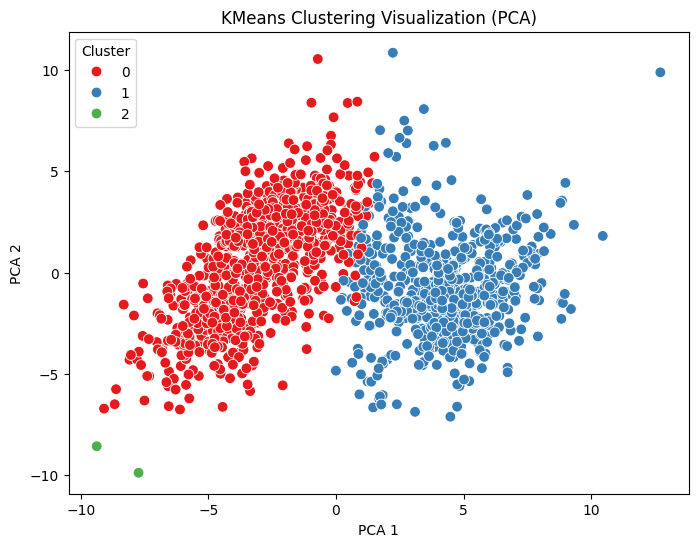

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=df["Cluster"], palette="Set1", s=60)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering Visualization (PCA)")
plt.legend(title="Cluster")
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 6 Clustering (Unsupervised Learning)\Visuals\Cluster.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 9: Interpret clusters

- Group by cluster and check averages:

In [14]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Group by 'Cluster' and compute mean only on numeric columns
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()
print(cluster_summary)


         MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
Cluster                                                                    
0         54.649942    66.967468   9871.701284     5.291715     5.866978   
1         59.925125    74.502033  11441.617304     7.252912     5.161398   
2        110.000000    64.500000   9054.500000     5.500000     5.000000   

           YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
Cluster                                                                 ...   
0        1951.757293   1973.458576   60.640607  378.060677   62.501750  ...   
1        1999.276206   2001.247920  166.242833  538.628952   23.956739  ...   
2        1915.000000   1950.000000    0.000000    0.000000    0.000000  ...   

         OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Cluster                                                                 
0          31.322054      32.947491   2.642940    16.803967  2.886814   
1   